
Dataset Preview:
   StudyHours  PreviousScores  FinalExamScore
0    8.777482              75              64
1    9.161915              55              82
2    3.278010              77              70
3    4.500247              60              60
4    2.264931              72              60

Missing values in dataset:
 StudyHours        0
PreviousScores    0
FinalExamScore    0
dtype: int64

Enter study hours: 4.5
Enter previous score: 65


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted Final Exam Score: 77.31


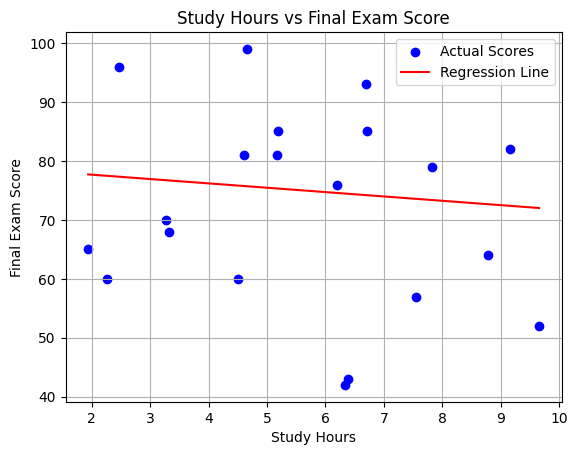

In [24]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Create the dataset manually (without uploading a file)
data = {
    "StudyHours": [8.777482, 9.161915, 3.278010, 4.500247, 2.264931, 5.178765, 5.195977, 7.551904, 1.940879, 3.315756,
                   4.599099, 2.471536, 6.708061, 6.692461, 9.654504, 6.392792, 4.655716, 6.339880, 6.195849, 7.819022],
    "PreviousScores": [75, 55, 77, 60, 72, 87, 45, 68, 73, 78, 99, 68, 63, 44, 85, 86, 57, 69, 52, 90],
    "FinalExamScore": [64, 82, 70, 60, 60, 81, 85, 57, 65, 68, 81, 96, 85, 93, 52, 43, 99, 42, 76, 79]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Step 3: Display first few rows
print("\nDataset Preview:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# Step 5: Define features (X) and target variable (y)
X = df[['StudyHours', 'PreviousScores']]  # Independent Variables
y = df['FinalExamScore']  # Dependent Variable

# Step 6: Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)


# Step 10: Live User Input for Prediction
study_hours = float(input("\nEnter study hours: "))
previous_score = float(input("Enter previous score: "))

# Predict final exam score
predicted_score = model.predict([[study_hours, previous_score]])
print(f"\nPredicted Final Exam Score: {predicted_score[0]:.2f}")

# Step 11: Visualization
plt.scatter(df['StudyHours'], df['FinalExamScore'], color='blue', label='Actual Scores')
plt.xlabel('Study Hours')
plt.ylabel('Final Exam Score')
plt.title('Study Hours vs Final Exam Score')
plt.grid(True)

# Plot Regression Line
x_range = np.linspace(min(df['StudyHours']), max(df['StudyHours']), 100).reshape(-1, 1)
y_range = model.predict(np.hstack((x_range, np.full_like(x_range, np.mean(df['PreviousScores'])))))
plt.plot(x_range, y_range, color='red', label='Regression Line')

plt.legend()
plt.show()